In [2]:
#Obtener los datos
import pandas as pd
import statsmodels.api as sm

In [3]:
data = pd.read_csv('btc-usd-max.csv')

In [4]:
data.head(20)

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.300,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.960,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.300,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.000,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.430,1.148668e+09,0.0
5,2013-05-03 00:00:00 UTC,91.010,1.011066e+09,0.0
6,2013-05-04 00:00:00 UTC,111.250,1.236352e+09,0.0
7,2013-05-05 00:00:00 UTC,116.790,1.298378e+09,0.0
8,2013-05-06 00:00:00 UTC,118.330,1.315992e+09,0.0
9,2013-05-07 00:00:00 UTC,106.400,1.183766e+09,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    4477 non-null   object 
 1   price         4477 non-null   float64
 2   market_cap    4477 non-null   float64
 3   total_volume  4477 non-null   float64
dtypes: float64(3), object(1)
memory usage: 140.0+ KB


In [6]:
data.isnull().sum()

snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64

In [7]:
# Convertir el índice a datetime
data.index = pd.to_datetime(data.snapped_at)
data = data.asfreq("D")  
print(data.info())   

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4479 entries, 2013-04-28 00:00:00+00:00 to 2025-08-01 00:00:00+00:00
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    4473 non-null   object 
 1   price         4473 non-null   float64
 2   market_cap    4473 non-null   float64
 3   total_volume  4473 non-null   float64
dtypes: float64(3), object(1)
memory usage: 175.0+ KB
None


In [8]:
data.isnull().sum()

snapped_at      6
price           6
market_cap      6
total_volume    6
dtype: int64

In [9]:
# Interpolate null values in the price column
print("Before interpolation:")
print(f"Null values in price column: {data['price'].isnull().sum()}")

# Linear interpolation for the price column
data['price'] = data['price'].interpolate(method='linear')

print("\nAfter linear interpolation:")
print(f"Null values in price column: {data['price'].isnull().sum()}")

Before interpolation:
Null values in price column: 6

After linear interpolation:
Null values in price column: 0


In [10]:
data = data[['price']]
data.info()

y = data['price']
df = pd.DataFrame({"y": y})
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4479 entries, 2013-04-28 00:00:00+00:00 to 2025-08-01 00:00:00+00:00
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4479 non-null   float64
dtypes: float64(1)
memory usage: 70.0 KB


,y
count,4479.000000
mean,21174.364199
std,27452.990461
min,67.809000
25%,637.618750
50%,8496.376959
75%,32629.246623
max,119955.795706


In [11]:
import plotly.graph_objects as go # type: ignore

# Crear la gráfica de la serie mensual de CO2
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y.index,
    y=y.values,
    mode='lines',
    name='CO2 (ppm)',
    line=dict(color='blue', width=1.5)
))

fig.update_layout(
    title='Serie Temporal de BITCOIN USD',
    xaxis_title='Fecha',
    yaxis_title='Precio (USD)',
    template='plotly_white',
    width=800,
    height=400
)

fig.show()

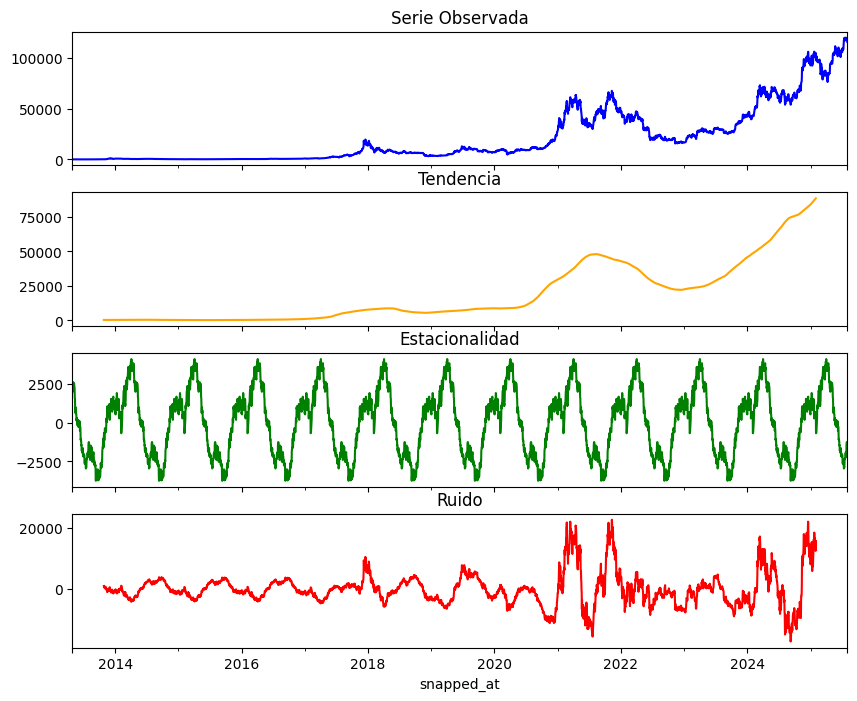

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomponer la serie
result = seasonal_decompose(data, period=365)

# Graficar los componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=ax1, title='Serie Observada', color='blue')
result.trend.plot(ax=ax2, title='Tendencia', color='orange')
result.seasonal.plot(ax=ax3, title='Estacionalidad', color='green')
result.resid.plot(ax=ax4, title='Ruido', color='red')

# plt.tight_layout()
plt.show()

In [13]:
# prueba de Dickey-Fuller aumentada (ADF)
from statsmodels.tsa.stattools import adfuller  
adf_result = adfuller(y.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.5736088208859585
p-value: 0.9869467418451077
Critical Values:
   1%, -3.43182134668231
Critical Values:
   5%, -2.8621901583375844
Critical Values:
   10%, -2.5671160831261064


<Figure size 1000x600 with 0 Axes>

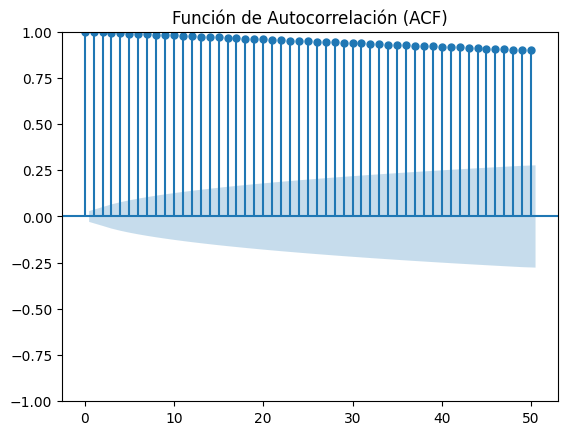

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt

# Graficar la función de autocorrelación (ACF)
plt.figure(figsize=(10, 6))
plot_acf(y, lags=50, alpha=0.05)
plt.title('Función de Autocorrelación (ACF)')
plt.show()

<Figure size 1000x600 with 0 Axes>

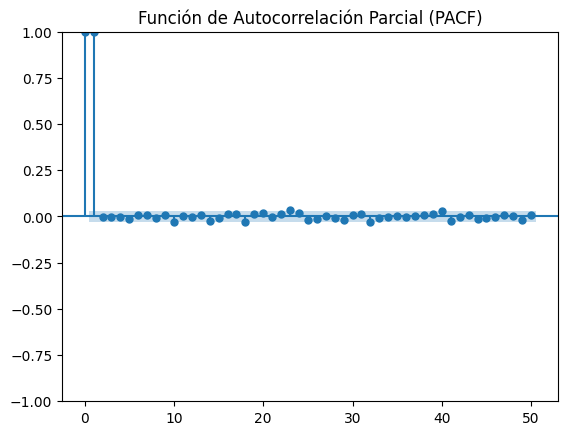

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

# Graficar la función de autocorrelación parcial (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(y, lags=50, alpha=0.05, method='ywm')
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()

In [16]:
# diferenciar la serie para hacerla estacionaria
y_diff = y.diff().dropna()
df_diff = pd.DataFrame({"y_diff": y_diff})
df_diff.head()


,y_diff
snapped_at,
2013-04-29 00:00:00+00:00,6.66
2013-04-30 00:00:00+00:00,-6.66
2013-05-01 00:00:00+00:00,-18.30
2013-05-02 00:00:00+00:00,-13.57
2013-05-03 00:00:00+00:00,-12.42


In [17]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go

# Crear subplots con dos gráficos uno encima del otro

fig = make_subplots(rows=2, cols=1, subplot_titles=("Serie Original", "Serie en Diferencias"))

# Agregar la serie original al primer gráfico
fig.add_trace(go.Scatter(x=y.index, y=y, mode='lines', name="Serie Original"), row=1, col=1)

# Agregar la serie en diferencias al segundo gráfico
fig.add_trace(go.Scatter(x=y_diff.index, y=y_diff, mode='lines', name="Serie en Diferencias"), row=2, col=1)

# Configurar el diseño del gráfico
fig.update_layout(
    title_text="Comparación de la Serie Original y la Serie en Diferencias",
    xaxis_title="Fecha",
    yaxis_title="Valor",
    showlegend=False
)

fig.show()

<Figure size 1000x600 with 0 Axes>

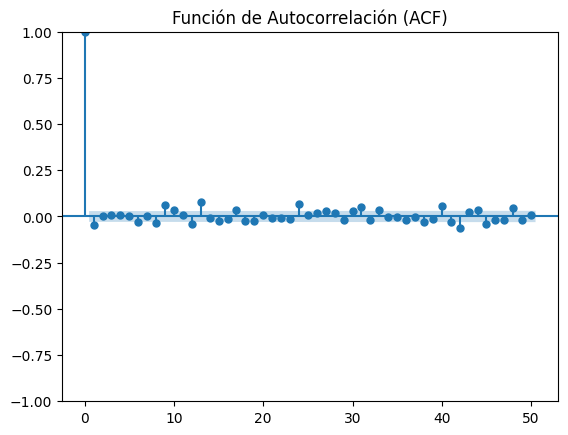

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt

# Graficar la función de autocorrelación (ACF)
plt.figure(figsize=(10, 6))
plot_acf(y_diff, lags=50, alpha=0.05)
plt.title('Función de Autocorrelación (ACF)')
plt.show()

In [19]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4479 entries, 2013-04-28 00:00:00+00:00 to 2025-08-01 00:00:00+00:00
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       4479 non-null   float64
dtypes: float64(1)
memory usage: 70.0 KB


In [20]:
H = 1000
train, test = df.iloc[:-H], df.iloc[-H:]

In [25]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(train, order=(1, 1, 0), enforce_stationarity=False, enforce_invertibility=False)
model = mod.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3479
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -27907.712
Date:                Mon, 20 Oct 2025   AIC                          55819.423
Time:                        18:41:15   BIC                          55831.731
Sample:                    04-28-2013   HQIC                         55823.817
                         - 11-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0247      0.008     -2.991      0.003      -0.041      -0.009
sigma2      5.485e+05   3942.873    139.103      0.000    5.41e+05    5.56e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

import plotly.graph_objects as go
import plotly.figure_factory as ff

# Extraer los residuales del modelo SARIMA, ignorando las primeras observaciones
residuals_sarima = model.resid[15:]  # Ignorar las primeras 12 observaciones

# Graficar los residuales
fig = go.Figure()
fig.add_trace(go.Scatter(x=residuals_sarima.index, y=residuals_sarima, mode='markers', name='Residuales'))
fig.add_trace(go.Scatter(x=residuals_sarima.index, y=[0]*len(residuals_sarima), mode='lines', name='Media Cero'))
fig.update_layout(title='Residuales del Modelo SARIMA (Ajustados)', xaxis_title='Fecha', yaxis_title='Residuales', showlegend=False)
fig.show()

# Realizar la prueba de Ljung-Box para verificar no autocorrelación
ljung_box_sarima_result = acorr_ljungbox(residuals_sarima, lags=[10], return_df=True)
print("Resultados de la prueba de Ljung-Box (Ajustados):")
print(ljung_box_sarima_result)

# Graficar la distribución de los residuales
fig = ff.create_distplot([residuals_sarima], group_labels=["Residuales"], show_hist=True, show_rug=False)
fig.update_layout(title="Distribución de los Residuales del Modelo SARIMA (Ajustados)", xaxis_title="Residuales", yaxis_title="Densidad")
fig.show()

# Realizar la prueba de Shapiro-Wilk para verificar normalidad
stat, p_value = shapiro(residuals_sarima)
print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p_value}")

if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: los residuales parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los residuales no siguen una distribución normal.")

Resultados de la prueba de Ljung-Box (Ajustados):
      lb_stat  lb_pvalue
10  40.482013   0.000014


Estadístico de Shapiro-Wilk: 0.6183315592377717, p-valor: 3.320140290851428e-66
Se rechaza la hipótesis nula: los residuales no siguen una distribución normal.


In [27]:
# Realizar el pronóstico para el conjunto de prueba
forecast = model.get_forecast(steps=H)
forecast_index = test.index
forecast_values = forecast.predicted_mean

# Graficar los valores reales y pronosticados
fig = go.Figure()

# Agregar los valores reales del conjunto de prueba
fig.add_trace(go.Scatter(x=test.index, y=test['y'], mode='lines', name='Valores Reales'))

# Agregar los valores pronosticados
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_values, mode='lines', name='Pronóstico'))

# Agregar las bandas de confianza
conf_int = forecast.conf_int()
fig.add_trace(go.Scatter(
    x=forecast_index.tolist() + forecast_index[::-1].tolist(),
    y=conf_int.iloc[:, 0].tolist() + conf_int.iloc[:, 1][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=False,
    name='Intervalo de Confianza'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Pronóstico vs Valores Reales en test",
    xaxis_title="Fecha",
    yaxis_title="CO2",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()

In [24]:
forecast_values.tail(50)

2025-06-13 00:00:00+00:00    21125.551936
2025-06-14 00:00:00+00:00    21125.551936
2025-06-15 00:00:00+00:00    21125.551936
2025-06-16 00:00:00+00:00    21125.551936
2025-06-17 00:00:00+00:00    21125.551936
2025-06-18 00:00:00+00:00    21125.551936
2025-06-19 00:00:00+00:00    21125.551936
2025-06-20 00:00:00+00:00    21125.551936
2025-06-21 00:00:00+00:00    21125.551936
2025-06-22 00:00:00+00:00    21125.551936
2025-06-23 00:00:00+00:00    21125.551936
2025-06-24 00:00:00+00:00    21125.551936
2025-06-25 00:00:00+00:00    21125.551936
2025-06-26 00:00:00+00:00    21125.551936
2025-06-27 00:00:00+00:00    21125.551936
2025-06-28 00:00:00+00:00    21125.551936
2025-06-29 00:00:00+00:00    21125.551936
2025-06-30 00:00:00+00:00    21125.551936
2025-07-01 00:00:00+00:00    21125.551936
2025-07-02 00:00:00+00:00    21125.551936
2025-07-03 00:00:00+00:00    21125.551936
2025-07-04 00:00:00+00:00    21125.551936
2025-07-05 00:00:00+00:00    21125.551936
2025-07-06 00:00:00+00:00    21125

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular métricas
mae = mean_absolute_error(test['y'], forecast_values)
mse = mean_squared_error(test['y'], forecast_values)
rmse = np.sqrt(mse)


# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae}")
print(f"MSE (Error Cuadrático Medio): {mse}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse}")

MAE (Error Absoluto Medio): 25543.21451280035
MSE (Error Cuadrático Medio): 896216643.6900395
RMSE (Raíz del Error Cuadrático Medio): 29936.877654325268


In [25]:
from statsmodels.stats.diagnostic import breaks_cusumolsresid

# Aplicar la prueba CUSUM a los residuales del modelo SARIMA
cusum_stat, p_value, critical_values = breaks_cusumolsresid(residuals_sarima)

# Mostrar los resultados de la prueba
print(f"Estadístico CUSUM: {cusum_stat}")
print(f"P-valor: {p_value}")
print(f"Valores críticos: {critical_values}")

# Graficar los resultados de la prueba CUSUM
fig = go.Figure()

# Agregar los residuales
fig.add_trace(go.Scatter(x=residuals_sarima.index, y=residuals_sarima, mode='lines', name='Residuales'))

# Agregar las líneas de los valores críticos
fig.add_trace(go.Scatter(x=residuals_sarima.index, y=[critical_values[0]] * len(residuals_sarima), mode='lines', name='Límite Inferior', line=dict(dash='dash', color='red')))
fig.add_trace(go.Scatter(x=residuals_sarima.index, y=[critical_values[1]] * len(residuals_sarima), mode='lines', name='Límite Superior', line=dict(dash='dash', color='red')))

# Agregar el sombreado entre los valores críticos
fig.add_trace(go.Scatter(
    x=residuals_sarima.index.tolist() + residuals_sarima.index[::-1].tolist(),
    y=[critical_values[0]] * len(residuals_sarima) + [critical_values[1]] * len(residuals_sarima[::-1]),
    fill='toself',
    fillcolor='rgba(255,0,0,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=False
))

# Configurar el diseño del gráfico con ajuste de escala
# fig.update_layout(
#     title="Prueba CUSUM para Análisis de Estabilidad del Modelo",
#     xaxis_title="Fecha",
#     yaxis_title="Residuales",
#     yaxis=dict(range=[min(residuals_sarima.min(), critical_values[0]) - 1, max(residuals_sarima.max(), critical_values[1]) + 1]),
#     showlegend=True
# )

fig.show()

Estadístico CUSUM: 1.4661187670767564
P-valor: 0.027163970349045004
Valores críticos: [(1, 1.63), (5, 1.36), (10, 1.22)]
